In [2]:
from qsim import VERSION

VERSION

'50e4f623dc647c0372f7e5d7dc6c9e88d48646c2'

# Imports

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from qsim.utils.utils import generate_plot_params

generate_plot_params()

from qsim.utils.quantum_guidelines import *

import matplotlib.pyplot as plt
import numpy as np

Setup methods loaded


# Script

`experiments/repeated_cnots/repeated_cnots.py`

# Plotting results

In [7]:
nbar_l = range(2, 10)

## Bitflips on target

In [8]:
results_bitflips = np.load("data_bitflips.npy", allow_pickle=True).item()

In [9]:
k2a_l = range(1, 21)
res = []
for nbar in nbar_l:
    for k2a in k2a_l:
        for index, label in zip([0, -1], ['First', 'Last']):
            res += [
                {
                    'nbar': nbar,
                    'k2a': k2a,
                    'pX_l': np.real(results_bitflips[nbar][k2a - 1]),
                    'pX': np.real(results_bitflips[nbar][k2a - 1][index]),
                    'logpX': np.real(
                        np.log(results_bitflips[nbar][k2a - 1][index])
                    ),
                    'Index': label,
                }
            ]

import pandas as pd

df = pd.DataFrame(res)
df

,nbar,k2a,pX_l,pX,logpX,Index
0,2,1,[0.009804642099447671],9.804642e-03,-4.624899,First
1,2,1,[0.009804642099447671],9.804642e-03,-4.624899,Last
2,2,2,"[0.010389279817601179, 0.020781651094905953]",1.038928e-02,-4.566981,First
3,2,2,"[0.010389279817601179, 0.020781651094905953]",2.078165e-02,-3.873685,Last
4,2,3,"[0.01052763157604082, 0.021549665076923356, 0....",1.052763e-02,-4.553752,First
...,...,...,...,...,...,...
315,9,18,"[7.234112587186982e-10, 2.540179676083692e-09,...",4.061597e-08,-17.019104,Last
316,9,19,"[6.912001963397025e-10, 2.487904005138564e-09,...",6.912002e-10,-21.092592,First
317,9,19,"[6.912001963397025e-10, 2.487904005138564e-09,...",4.450452e-08,-16.927675,Last
318,9,20,"[6.667344087139633e-10, 2.446756046556947e-09,...",6.667344e-10,-21.128629,First


In [10]:
df[df['k2a'] == 1]

,nbar,k2a,pX_l,pX,logpX,Index
0,2,1,[0.009804642099447671],9.804642e-03,-4.624899,First
1,2,1,[0.009804642099447671],9.804642e-03,-4.624899,Last
40,3,1,[0.0014269055810379933],1.426906e-03,-6.552247,First
41,3,1,[0.0014269055810379933],1.426906e-03,-6.552247,Last
80,4,1,[0.00018281020731716142],1.828102e-04,-8.607062,First
81,4,1,[0.00018281020731716142],1.828102e-04,-8.607062,Last
120,5,1,[2.1619123756225385e-05],2.161912e-05,-10.741932,First
121,5,1,[2.1619123756225385e-05],2.161912e-05,-10.741932,Last
160,6,1,[2.5210014099260865e-06],2.521001e-06,-12.890854,First
161,6,1,[2.5210014099260865e-06],2.521001e-06,-12.890854,Last


{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}
{2, 3, 4, 5, 6, 7, 8, 9}
1       1
9       5
19     10
29     15
39     20
41      1
49      5
59     10
69     15
79     20
81      1
89      5
99     10
109    15
119    20
121     1
129     5
139    10
149    15
159    20
161     1
169     5
179    10
189    15
199    20
201     1
209     5
219    10
229    15
239    20
241     1
249     5
259    10
269    15
279    20
Name: k2a, dtype: int64
[9.80464210e-03 1.42690558e-03 1.82810207e-04 2.16191238e-05
 2.52100141e-06 2.81807994e-07 2.50394515e-08]
[-0.85740688]
[2.65937652e-01 5.84880076e-02 7.75783980e-03 8.39689033e-04
 8.45963130e-05 8.12953243e-06 6.92901619e-07]
[2.65929113]


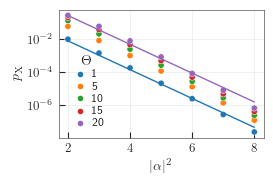

In [35]:
import seaborn as sns
from scipy.optimize import curve_fit

props = global_setup(columns="twocolumn", paper="a4paper", fontsize=11)
%matplotlib inline

print(set(df['k2a']))
print(set(df['nbar']))
df_plot = df[
    df['k2a'].isin([1, 5, 10, 15, 20])
    & (df['nbar'] < 9)
    & (df['Index'] == 'Last')
]

print(df_plot['k2a'])

g = sns.relplot(
    data=df_plot,
    x='nbar',
    y='pX',
    hue='k2a',
    # col='k2a',
    markers=True,
    kind='scatter',
    height=1.7,
    aspect=1.22,
    palette=sns.color_palette()[: len([1, 5, 10, 15, 20])],
    s=20
).set(yscale='log')
# index_l = ['First']
# k2a_l = [1, 5, 10, 15, 20]
for i, ax in enumerate(g.fig.axes):
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.grid(alpha=0.4)

def fit_exp(x, a):
    return -2*x+a

nbar_l = list(set(df_plot.nbar.to_numpy()))
for k2a in [1, 20]:
    pX_l = df_plot[df_plot['k2a'] == k2a].pX.to_numpy()
    print(pX_l)
    logpX_l = np.log(pX_l)
    popt, pcov = curve_fit(
        fit_exp,
        nbar_l,
        logpX_l,
    )
    print(popt)
    a = np.exp(popt[0])
    ax.plot(
        nbar_l,
        [np.exp(-2*nbar)*a for nbar in nbar_l],
        color='tab:blue' if k2a == 1 else 'tab:purple'
    )


g._legend.remove()
ax = g.fig.axes[0]
ax.legend(
    handletextpad=0.08,
    labelspacing=0.2,
    frameon=False,
    bbox_to_anchor=(-0, -0.),
    loc="lower left",
    title='$\\Theta$'
)




g.set_ylabels('$p_\mathrm{X}$', clear_inner=False)
# g.set_xlabels('$\\overline{n}$', clear_inner=False)
g.set_xlabels('$|\\alpha|^2$', clear_inner=False)
g.set_titles(
    # row_template = '{row_name}',
    # col_template='$p_{{target}} = {new_col_name[col_name]}$'
    col_template='$\\Theta = {col_name}$'
)
plt.tight_layout(pad=0.2)
# plt.tight_layout()
plt.savefig('data_bitflips_first_and_last_single_cnot.pdf')